In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import KFold
df = pd.read_csv("data_set.csv")
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [2]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [3]:
df.groupby('label').count()

,title,text
label,,
FAKE,3164,3164
REAL,3171,3171


In [4]:
df[df['label'] == 'REAL']

,title,text,label
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
df[df['label'] == 'FAKE']

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,"Tehran, USA","I’m not an immigrant, but my grandparents are....",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


<AxesSubplot:xlabel='label'>

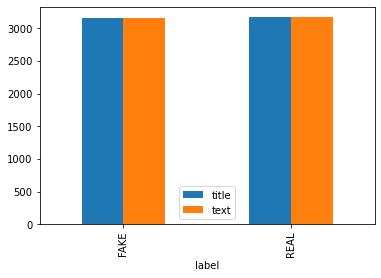

In [6]:
df.groupby('label').count().plot.bar()

([<matplotlib.patches.Wedge at 0x2a6eb817c70>,
 [Text(-1.0999983431305196, -0.0019092171462993539, 'REAL'),
  Text(1.0999983431305196, 0.0019092171462992192, 'FAKE')],
 [Text(-0.5999990962530106, -0.0010413911707087384, '50.06%'),
  Text(0.5999990962530106, 0.0010413911707086649, '49.94%')])

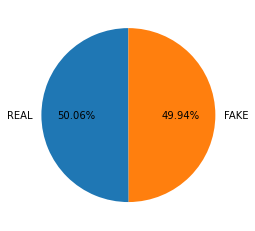

In [7]:
x = [len(df[df['label'] == 'REAL']),len(df[df['label'] == 'FAKE'])]
y = ['REAL', 'FAKE']
plt.pie(x = x, labels = y, autopct='%0.2f%%', startangle=90)

In [8]:
vectorizor = TfidfVectorizer()

In [9]:
features = vectorizor.fit_transform(df['title'])

In [10]:
labels = df['label']

In [11]:
features

<6335x10071 sparse matrix of type '<class 'numpy.float64'>'
	with 63910 stored elements in Compressed Sparse Row format>

In [12]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [13]:
kf = KFold(5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [14]:
for train, test in kf.split(features):
    model = SVC()
    model.fit(features[train],labels.iloc[train])
    prediction = model.predict(features[test])
    print(classification_report(prediction, labels.iloc[test]))

              precision    recall  f1-score   support

        FAKE       0.88      0.81      0.85       689
        REAL       0.79      0.87      0.83       578

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267

              precision    recall  f1-score   support

        FAKE       0.86      0.81      0.83       710
        REAL       0.77      0.84      0.80       557

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

              precision    recall  f1-score   support

        FAKE       0.87      0.78      0.82       662
        REAL       0.79      0.87      0.83       605

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

              preci

In [15]:
sample = pd.DataFrame(['Tighter travel rules, free at home-tests and boosters: Biden unveils COVID-19 winter plan','‘Nightmare Alley’ First Reactions Commend Guillermo del Toro Noir’s ‘Breathtaking’ Production Design, Bradley Cooper’s ‘Career-Best Performance’'],columns = ['title'])
sample

,title
0,"Tighter travel rules, free at home-tests and b..."
1,‘Nightmare Alley’ First Reactions Commend Guil...


In [16]:
simple_tests = vectorizor.transform(sample['title'])

In [17]:
model.predict(simple_tests)

array(['REAL', 'FAKE'], dtype=object)

In [18]:
url = ('https://newsapi.org/v2/everything?'
       'q=Apple&'
       'from=2021-12-11&'
       'language=en&'
       'sortBy=popularity&'
       'apiKey=0f8e1a86c220413d94ee909381ed95df')

response = requests.get(url).json()

title_list = []
content_list = []

for news in response['articles']:
    title_list.append(news['title'])
    content_list.append(news['content'].replace('\n','').replace('\r','').replace('\f',''))
title = pd.DataFrame(title_list, columns=['title'])
content = pd.DataFrame(content_list, columns=['content'])
apple_news = pd.concat([title,content],axis = 1)
apple_news

,title,content
0,Apple Is Rolling Out a Manual Firmware Updater...,"As many AirPod owners probably know, Apples wi..."
1,The Holidays Are for Martinelli’s,That the sparkling cider is nonalcoholic is a ...
2,The technology helping keep women safe on the ...,By Shiona McCallumTechnology reporterHalf of a...
3,How to make CNN host Brianna Keilar's chili ma...,"In this seven-part series, CNN anchors invite ..."
4,Blinken heads to Southeast Asia to deepen coop...,"WASHINGTON, Dec 12 (Reuters) - The Biden admin..."
5,Nvidia likely isn't going to be able to buy Arm,Source: Jerry Hildenbrand / Android CentralNvi...
6,Amazfit GTR 3 Pro review: Minimalist design me...,Source: Harish Jonnalagadda / Android CentralA...
7,Nigel Slater’s recipes for cranberry and apple...,"It isnt just that the harvest is in November, ..."
8,All is quiet on the allotment front | Allan Je...,Theres maybe nothing as naked as a winter larc...
9,Pork belly and braised chard: Sally Abé’s alte...,Pork may not be everyones first thought when i...


In [19]:
apple_news_tests = vectorizor.transform(apple_news['title'])

In [20]:
model.predict(apple_news_tests)

array(['FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [21]:
url = ('https://newsapi.org/v2/everything?'
       'q=tesla&'
       'from=2021-12-11&'
       'language=en&'
       'sortBy=popularity&'
       'apiKey=0f8e1a86c220413d94ee909381ed95df')

response = requests.get(url).json()

title_list = []
content_list = []

for news in response['articles']:
    title_list.append(news['title'])
    content_list.append(news['content'].replace('\n','').replace('\r','').replace('\f',''))
title = pd.DataFrame(title_list, columns=['title'])
content = pd.DataFrame(content_list, columns=['content'])
Tesla_news = pd.concat([title,content],axis = 1)
Tesla_news

,title,content
0,"Volkswagen, Bosch to cooperate on automotive s...","FRANKFURT, Dec 11 (Reuters) - Volkswagen's (VO..."
1,Ford expects to triple electric Mustang output...,Dec 10 (Reuters) - Ford Motor Co (F.N) expects...
2,Will Elon Musk be remembered as an automotive ...,"As I write, Tesla, the manufacturer of electri..."
3,"Big families sound great, Elon Musk. But who’s...","Six children, seven it could sound like a lot ..."
4,From hairpin to house: woman who mastered ‘tra...,"After a year and a half of pouring blood, swea..."
5,The next age of the internet could suck power ...,"In the next era of the internet, you won't hav..."
6,Elon Musk Says the Cybertruck’s Huge Windshiel...,After a video surfaced showing the Tesla Cyber...
7,The Weekly Authority: Moto Edge X30 and Pixel ...,"Welcome again to The Weekly Authority, the And..."
8,Extremely Critical Log4J Vulnerability Leaves ...,The Apache Software Foundation has released fi...
9,How hologram tech may soon replace video calls,By Andrea Murad and Will SmaleBusiness reporte...


In [22]:
Tesla_news_tests = vectorizor.transform(Tesla_news['title'])

In [23]:
model.predict(Tesla_news_tests)

array(['FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE'], dtype=object)

In [24]:
url = ('https://newsapi.org/v2/everything?'
       'domains=techcrunch.com,thenextweb.com&'
       'from=2021-12-11&'
       'language=en&'
       'sortBy=popularity&'
       'apiKey=0f8e1a86c220413d94ee909381ed95df')

response = requests.get(url).json()

title_list = []
content_list = []

for news in response['articles']:
    title_list.append(news['title'])
    content_list.append(news['content'].replace('\n','').replace('\r','').replace('\f',''))
title = pd.DataFrame(title_list, columns=['title'])
content = pd.DataFrame(content_list, columns=['content'])
tech_news = pd.concat([title,content],axis = 1)
tech_news

,title,content
0,"iPhone 14 Pro leaks say the notch is dead, but...",Weve been hearing rumors that Apple would get ...
1,We invited an AI to debate its own ethics in t...,Not a day passes without a fascinating snippet...
2,"Hey, React devs! Here’s why UI libraries will ...",Slow and steady wins the race. Weve all heard ...
3,The US Patent and Trademark Office should act ...,"The U.S. patent system, which should fuel inve..."
4,It's time for democracies to protect dissident...,The TechCrunch Global Affairs Project examines...
5,"This Week in Apps: 2021 review, App Store chan...","Welcome back to This Week in Apps, the weekly ..."
6,It's time for democracies to protect dissident...,The TechCrunch Global Affairs Project examines...
7,How Volvo plans to maintain its safety rep whi...,Safety in modern cars is no longer simply a qu...
8,Small notes on big news,"Welcome to The TechCrunch Exchange, a weekly s..."
9,Startups Weekly (Taylor’s Version),"Welcome to Startups Weekly, a fresh human-firs..."


In [25]:
tech_news_tests = vectorizor.transform(tech_news['title'])

In [26]:
model.predict(tech_news_tests)

array(['FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'FAKE'], dtype=object)

In [27]:
url = ('https://newsapi.org/v2/top-headlines?'
       'country=us&'
       'category=business&'
       'apiKey=0f8e1a86c220413d94ee909381ed95df')

response = requests.get(url).json()

title_list = []

for news in response['articles']:
    title_list.append(news['title'])
business_news = pd.DataFrame(title_list, columns=['title'])
business_news

,title
0,Own everything but 'bubble assets' tech and cr...
1,Ascendex Hacked — Exchange Loses $77 Million i...
2,"Fed decision, inflation data, FedEx and Rivian..."
3,Alibaba Fires Female Employee Who Accused Then...
4,"Fred Meyer, QFC grocery workers authorize stri..."
5,Hawaii records 5 new coronavirus-related death...
6,Biden says he is 'deeply troubled' by Kellogg’...
7,How to Find the Healthiest Dividend Stocks for...
8,Bitcoin rises 2.1% to reclaim $50000 - Reuters
9,Omicron appears to 'evade' some protection fro...


In [28]:
business_news_tests = vectorizor.transform(business_news['title'])

In [29]:
model.predict(business_news_tests)

array(['FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL',
       'FAKE', 'FAKE', 'FAKE', 'FAKE'], dtype=object)